<a href="https://colab.research.google.com/github/armandordorica/Twitter_Sentiment_Analysis/blob/master/Amazon_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refs: 
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ 

https://github.com/deshpandenu/Time-Series-Forecasting-of-Amazon-Stock-Prices-using-Neural-Networks-LSTM-and-GAN-/blob/master/Notebook%202_%20Stock%20Market%20Analysis%20using%20LSTM(Vanilla)-how%20good%20is%20a%20LSTM%20at%20predicting%20price%20movement.ipynb

https://www.datacamp.com/community/tutorials/lstm-python-stock-market


In [35]:
!pip install tensorflow==1.14

In [0]:

#import libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [37]:
from google.colab import files
uploaded = files.upload()

Saving AMZN.csv to AMZN (1).csv


In [0]:
df = pd.read_csv('AMZN.csv')

In [39]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


### **MinMaxScaler**
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [0]:
df_close = df['Close']
df_close = df_close.values.reshape(5760,1)

In [0]:
df_dates = df['Date']

In [0]:
df_dates = np.array(df_dates)

In [0]:
df_close = np.array(df_close)

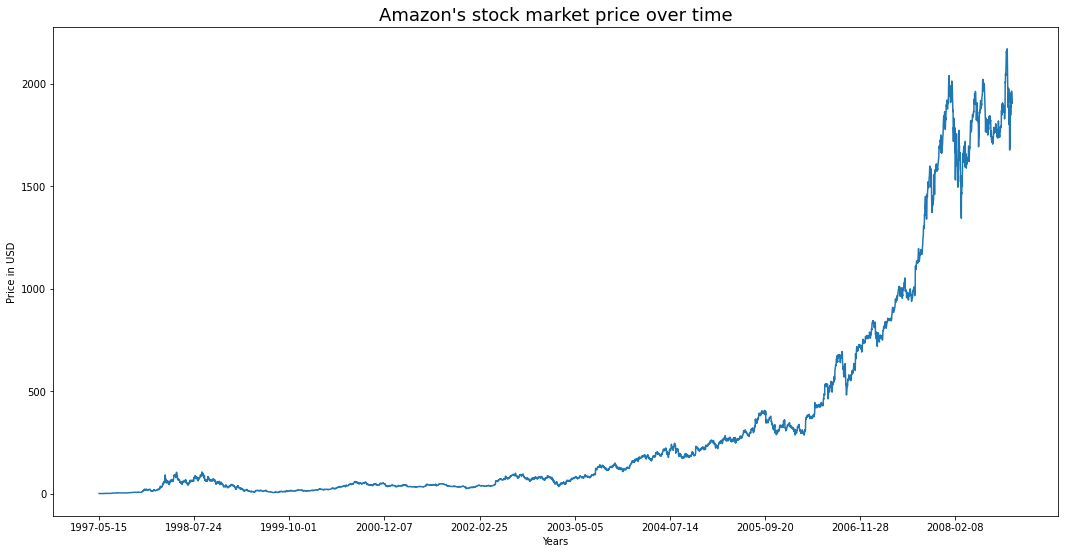

In [44]:
import matplotlib.dates as mdates

plt.figure(figsize = (18,9))
plt.plot(df_dates, df_close)

plt.xticks(np.arange(0,len(df),600), df['Date'][0:len(df):300])

plt.ylabel('Price in USD')
plt.xlabel('Years')
plt.title("Amazon's stock market price over time", fontsize = 18)

plt.show()


In [0]:
X = df_dates

In [0]:
Y = df_close

In [0]:

scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)

### Normalizing Amazon's stock's price 

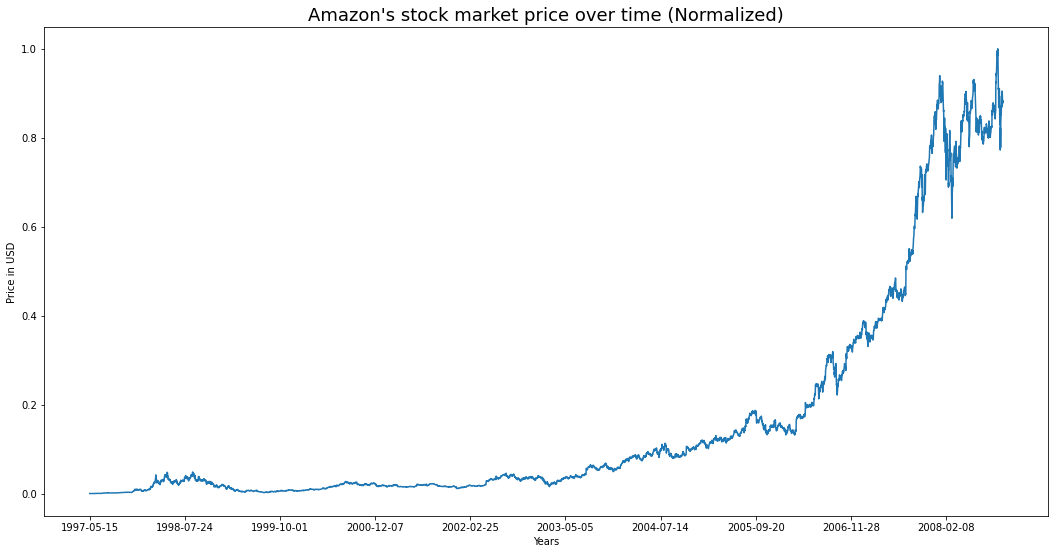

In [48]:
import matplotlib.dates as mdates

plt.figure(figsize = (18,9))
plt.plot(df_dates, df_close)

plt.xticks(np.arange(0,len(df),600), df['Date'][0:len(df):300])

plt.ylabel('Price in USD')
plt.xlabel('Years')
plt.title("Amazon's stock market price over time (Normalized)", fontsize = 18)

plt.show()

In [50]:
df['Close']

0          1.958333
1          1.729167
2          1.708333
3          1.635417
4          1.427083
           ...     
5755    1963.949951
5756    1949.719971
5757    1907.699951
5758    1918.829956
5759    1906.589966
Name: Close, Length: 5760, dtype: float64

In [0]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [0]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [0]:
series = df['Close']

In [0]:
series.index = df['Date']

In [83]:
series

Date
1997-05-15       1.958333
1997-05-16       1.729167
1997-05-19       1.708333
1997-05-20       1.635417
1997-05-21       1.427083
                 ...     
2020-03-30    1963.949951
2020-03-31    1949.719971
2020-04-01    1907.699951
2020-04-02    1918.829956
2020-04-03    1906.589966
Name: Close, Length: 5760, dtype: float64

In [0]:
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]

In [85]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
# seasonal difference
X = dataset.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5388
Model:                     ARMA(7, 1)   Log Likelihood              -22042.960
Method:                       css-mle   S.D. of innovations             14.464
Date:                Sat, 11 Apr 2020   AIC                          44105.919
Time:                        16:25:55   BIC                          44171.839
Sample:                             0   HQIC                         44128.936
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.2215     78.205      1.473      0.141     -38.058     268.501
ar.L1.y        0.2046      0.050      4.053      0.000       0.106       0.304
ar.L2.y        0.7880      0.050     15.914      0.0

In [0]:
forecast = model_fit.forecast()[0]

In [0]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)

In [88]:
print('Forecast: %f' % forecast)

Forecast: 1861.970126


In [0]:
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)

In [0]:
from pandas import datetime

forecast = model_fit.predict(start=start_index, end=end_index)

In [91]:

# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 1861.970126


In [0]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]

In [93]:
forecast_one_week_ahead = []
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 1861.970126
Day 2: 1914.919430
Day 3: 1899.303806
Day 4: 1944.565770
Day 5: 1967.178251
Day 6: 1897.415204
Day 7: 1896.640455


In [0]:
history_np = np.array(history)

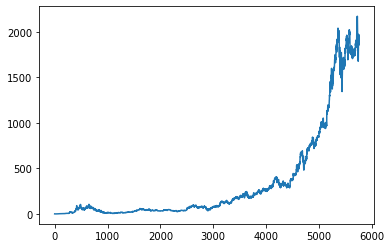

In [95]:
plt.plot(history_np)

In [96]:
len(df)

5760

In [97]:
len(history_np)

5760

In [98]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 5753, Validation 7


In [127]:
len(list(dataset))

5753

In [128]:
len(list(history))

5760

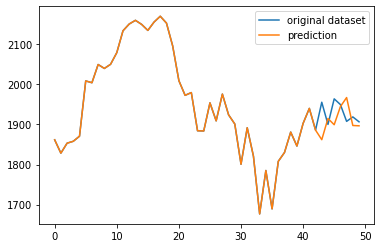

In [133]:
plt.plot(list(series)[-50:], label = 'original dataset')
plt.plot(history[-50:], label = 'prediction')
plt.legend()

### **ARIMA finishes here**

In [17]:
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train = df_close[0:train_size,:]
test = df_close[train_size:len(df_close),:]
print(len(train), len(test))

4608 1152


In [0]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): #keep only similar value data if a data point is too far of the last one jump to the next value
	dataX, dataY = [], []       #put this in data x
	for i in range(len(dataset)-look_back-1): #let dataY have only output values
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print ('compilation time : ', time.time() - start)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  if sys.path[0] == '':


compilation time :  0.04009294509887695


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [28]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=40,
    validation_split=0.05)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 4375 samples, validate on 231 samples
Epoch 1/40
4375/4375 [==============================] - 1s 174us/step - loss: 0.0017 - mae: 0.0315 - val_loss: 0.0117 - val_mae: 0.1053
Epoch 2/40
4375/4375 [==============================] - 0s 57us/step - loss: 6.5299e-04 - mae: 0.0196 - val_loss: 3.3485e-04 - val_mae: 0.0159
Epoch 3/40
4375/4375 [==============================] - 0s 58us/step - loss: 1.0776e-04 - mae: 0.0077 - val_loss: 2.1611e-04 - val_mae: 0.0142
Epoch 4/40
4375/4375 [==============================] - 0s 63us/step - loss: 6.9564e-05 - mae: 0.0064 - val_loss: 2.2733e-05 - val_mae: 0.0036
Epoch 5/40
4375/4375 [==============================] - 0s 56us/step - loss: 6.0697e-05 - mae: 0.0062 - val_loss: 2.4884e-05 - val_mae: 0.0036
Epoch 6/40
4375/4375 [==============================] - 0s 56us/step - loss: 5.9877e-05 - mae: 0.0060 - val_loss: 4.0597e-05 - val_mae: 0.0053
Epoch 7/40
4375/4375 [==============================] - 0s 54us/step - loss: 5.8932e-05 - mae: 0.0063 

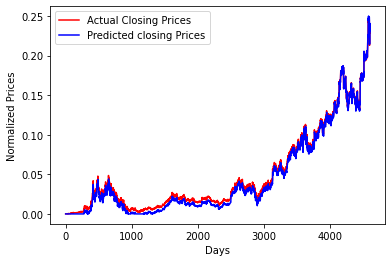

In [29]:

import matplotlib.pyplot as plt
predicted_stateful = model.predict(trainX)
plt.plot(trainY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalized Prices')
plt.legend(loc='best')
plt.show()

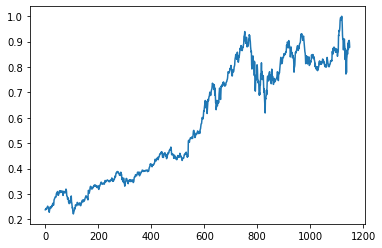

In [30]:
plt.plot(testX.flatten())

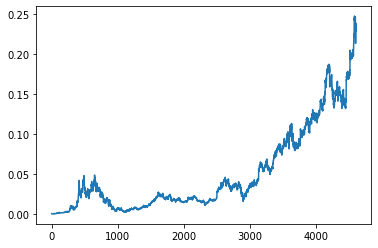

In [31]:
plt.plot(trainX.flatten())

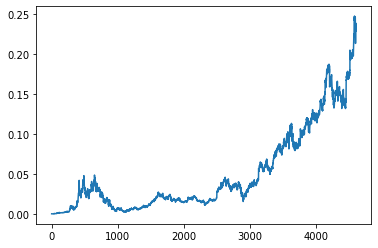

In [32]:
plt.plot(trainY.flatten())

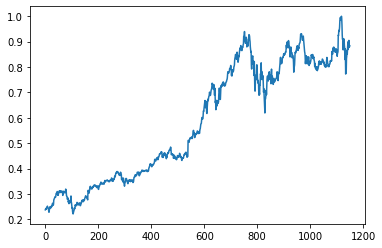

In [33]:
plt.plot(testY.flatten())

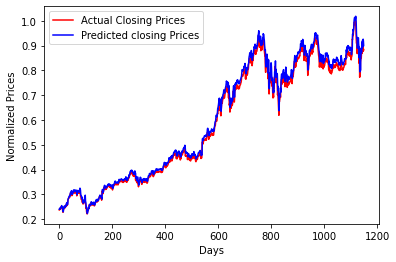

In [34]:

import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalized Prices')
plt.legend(loc='best')
plt.show()